In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load Dataset
data_path = r"C:\Users\karkw\Downloads\Data Analyst Assignment_Bitla Software.csv"
df = pd.read_csv(data_path)

In [54]:
pd.set_option('display.max_rows', None)
print(df)

            DOI         DOJ         DOC     PNR    PG Name Booking Source  \
23   17-10-2024  03-11-2024  28-10-2024   80235  CC_AVENUE            Web   
24   19-10-2024  19-10-2024  19-10-2024   80480      PAYTM         Mobweb   
42   13-11-2024  18-11-2024  14-11-2024   92009  CC_AVENUE         Mobweb   
63   07-10-2024  08-10-2024  07-10-2024  566815      PAYTM         Mobweb   
71   11-10-2024  17-10-2024  15-10-2024  568060      PAYTM         Mobweb   
104  31-10-2024  02-11-2024  31-10-2024  573824  CC_AVENUE            Web   
114  05-11-2024  13-11-2024  13-11-2024  575166      PAYTM            Web   
139  15-11-2024  15-11-2024  15-11-2024  577823      PAYTM         Mobweb   
167  09-10-2024  09-10-2024  09-10-2024  184944      PAYTM         Mobweb   
198  19-10-2024  29-10-2024  25-10-2024  188329      PAYTM         Mobweb   
201  19-10-2024  30-10-2024  28-10-2024  188413      PAYTM         Mobweb   
204  19-10-2024  28-10-2024  24-10-2024  188456      PAYTM         Mobweb   

In [56]:
# Data Cleaning
df.dropna(inplace=True)
df['Total Fare'] = df['Fare'] - df['Disc']
print(df)

            DOI         DOJ         DOC     PNR    PG Name Booking Source  \
23   17-10-2024  03-11-2024  28-10-2024   80235  CC_AVENUE            Web   
24   19-10-2024  19-10-2024  19-10-2024   80480      PAYTM         Mobweb   
42   13-11-2024  18-11-2024  14-11-2024   92009  CC_AVENUE         Mobweb   
63   07-10-2024  08-10-2024  07-10-2024  566815      PAYTM         Mobweb   
71   11-10-2024  17-10-2024  15-10-2024  568060      PAYTM         Mobweb   
104  31-10-2024  02-11-2024  31-10-2024  573824  CC_AVENUE            Web   
114  05-11-2024  13-11-2024  13-11-2024  575166      PAYTM            Web   
139  15-11-2024  15-11-2024  15-11-2024  577823      PAYTM         Mobweb   
167  09-10-2024  09-10-2024  09-10-2024  184944      PAYTM         Mobweb   
198  19-10-2024  29-10-2024  25-10-2024  188329      PAYTM         Mobweb   
201  19-10-2024  30-10-2024  28-10-2024  188413      PAYTM         Mobweb   
204  19-10-2024  28-10-2024  24-10-2024  188456      PAYTM         Mobweb   

In [57]:
# Most Frequent Routes
route_counts = df.groupby(['Origin', 'Destination']).size().reset_index(name='Count')
most_frequent_routes = route_counts.sort_values(by='Count', ascending=False).head(10)
print(most_frequent_routes)

       Origin       Destination  Count
3     Chennai        Dharmapuri      2
14  Mangalore  Tirupati package      2
13  Mangalore         Bangalore      2
0    Amritsar       Dharamshala      1
10  Hyderabad            Geedam      1
16   Thokkout         Bangalore      1
15    Nelyady         Bangalore      1
12     Konaje         Bangalore      1
11  Jagdalpur         Hyderabad      1
9       Erode       Pondicherry      1


In [60]:
# Preferred Booking Channels
booking_channels = df['Booking Source'].value_counts()
print(booking_channels)

# Operator Revenue Analysis
operator_revenue = df.groupby('Bus Operator Name')['Total Fare'].sum().reset_index()
most_profitable_operators = operator_revenue.sort_values(by='Total Fare', ascending=False).head(10)
print(most_profitable_operators)

Booking Source
Mobweb    15
Web        6
Name: count, dtype: int64
  Bus Operator Name    Total Fare
5    Bus Operator 9  16700.000000
3    Bus Operator 6  12060.000000
2    Bus Operator 5   6250.000000
4    Bus Operator 7   3100.000000
0    Bus Operator 3   1699.000000
1    Bus Operator 4    841.700001


In [59]:
# Underutilized Operators (Low Seat Occupancy)
df['Seat Occupancy'] = df['No Of Seats'] / df['No Of Seats'].max()
underutilized_operators = df[df['Seat Occupancy'] < 0.5].groupby('Bus Operator Name').size().reset_index(name='Low Occupancy Count')

# Most Profitable Routes
profitable_routes = df.groupby(['Origin', 'Destination'])['Total Fare'].sum().reset_index()
profitable_routes = profitable_routes.sort_values(by='Total Fare', ascending=False).head(10)
print(profitable_routes)

        Origin       Destination  Total Fare
14   Mangalore  Tirupati package     15300.0
7    Cuddalore         Bangalore      4500.0
13   Mangalore         Bangalore      2950.0
9        Erode       Pondicherry      2160.0
10   Hyderabad            Geedam      2000.0
12      Konaje         Bangalore      1600.0
17    Tirupati         Mangalore      1400.0
1    Bangalore         Hyderabad      1399.0
6   Coimbatore           Vadalur      1260.0
4      Chennai       Poonthottam      1260.0


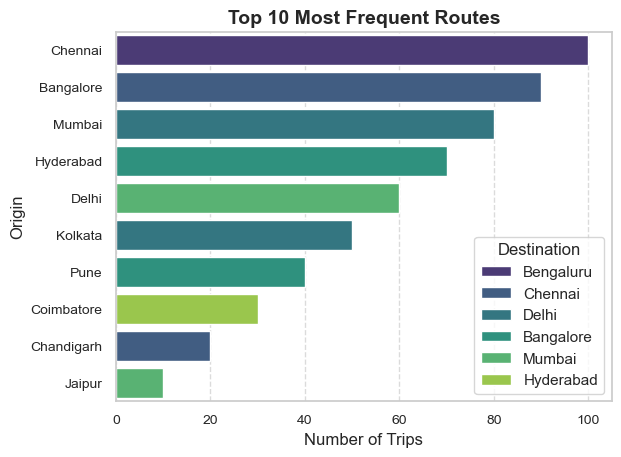

In [46]:
# Create a horizontal bar chart
sns.barplot(
    x="Count", 
    y="Origin", 
    hue="Destination", 
    data=most_frequent_routes, 
    dodge=False,  # Ensures no overlap of bars
    palette="viridis"  # Use an appealing color palette
)

# Improve aesthetics
plt.xlabel("Number of Trips", fontsize=12)
plt.ylabel("Origin", fontsize=12)
plt.title("Top 10 Most Frequent Routes", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

C:\Users\karkw\AppData\Local\Temp\ipykernel_14280\3638164999.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


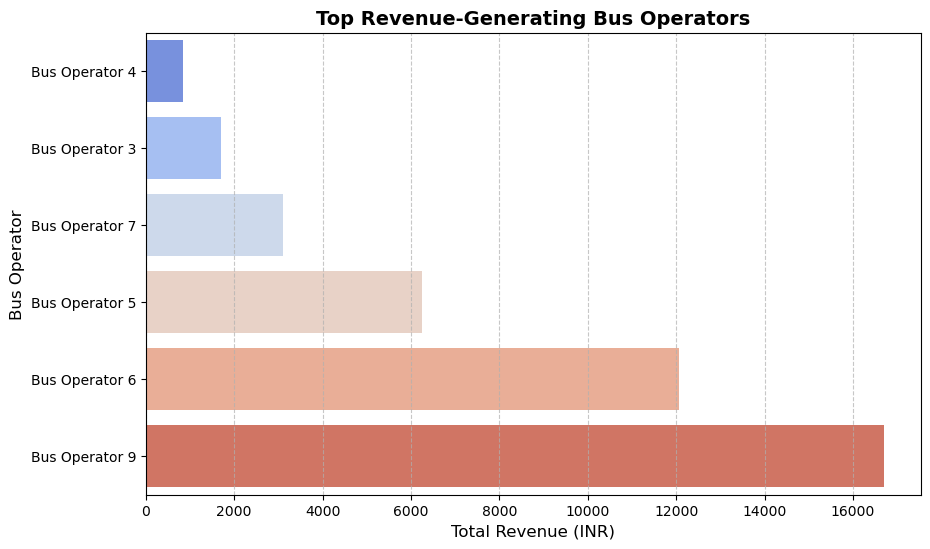

In [23]:
operator_revenue_sorted = most_profitable_operators.sort_values(by="Total Fare", ascending=True)

# Create figure
plt.figure(figsize=(10, 6))

# Create horizontal bar plot
sns.barplot(
    x="Total Fare", 
    y="Bus Operator Name", 
    data=operator_revenue_sorted, 
    palette="coolwarm"
)

# Titles and labels
plt.xlabel("Total Revenue (INR)", fontsize=12)
plt.ylabel("Bus Operator", fontsize=12)
plt.title("Top Revenue-Generating Bus Operators", fontsize=14, fontweight="bold")

# Grid for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

C:\Users\karkw\AppData\Local\Temp\ipykernel_14280\3121036724.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Bus Operator Name', y='Low Occupancy Count', data=underutilized_operators, palette='viridis')


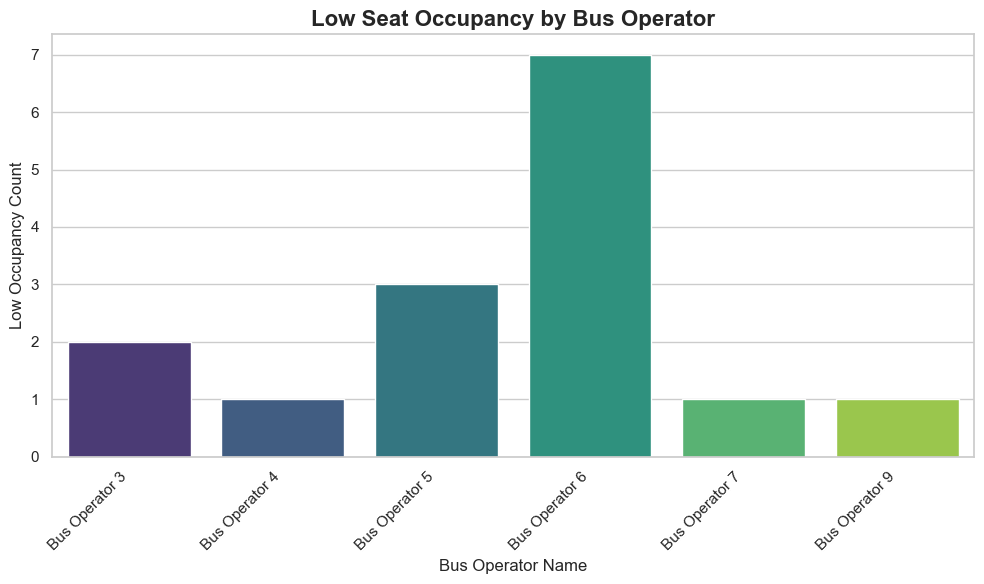

In [24]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Bus Operator Name', y='Low Occupancy Count', data=underutilized_operators, palette='viridis')

# Title and labels
plt.title('Low Seat Occupancy by Bus Operator', fontsize=16, fontweight='bold')
plt.xlabel('Bus Operator Name', fontsize=12)
plt.ylabel('Low Occupancy Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot with adjusted layout
plt.tight_layout()
plt.show()

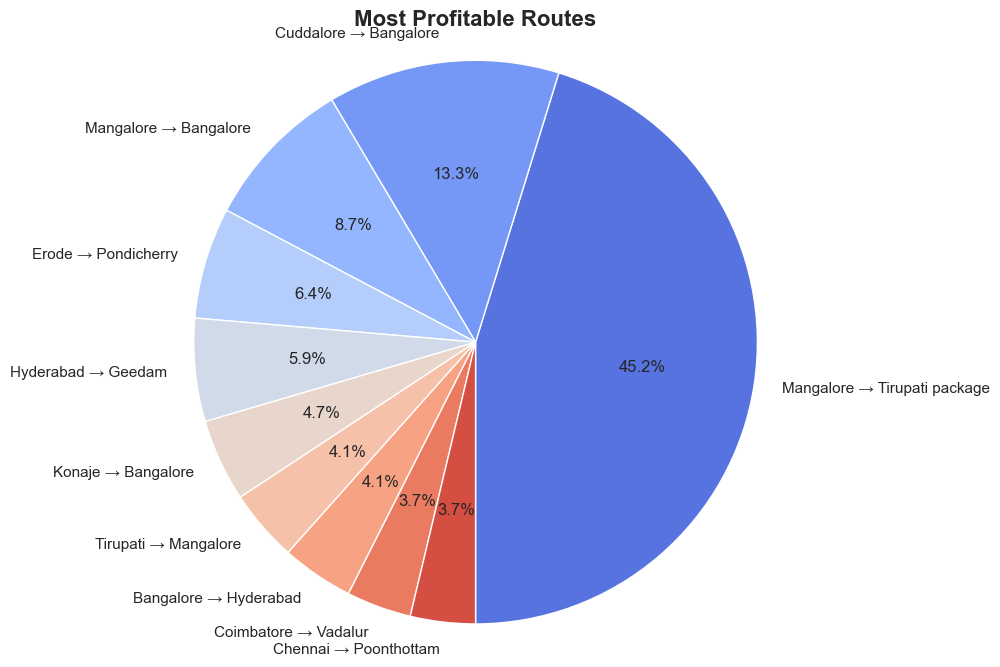

In [29]:

# Plotting the pie chart
plt.figure(figsize=(8, 8))

# Rotate the pie chart so the smallest segment is at the bottom
plt.pie(profitable_routes['Total Fare'], 
        labels=profitable_routes['Origin'] + ' → ' + profitable_routes['Destination'], 
        autopct='%1.1f%%', 
        colors=sns.color_palette("coolwarm", len(profitable_routes)), 
        startangle=270)  # Rotate to start from the bottom

# Add title
plt.title('Most Profitable Routes', fontsize=16, fontweight='bold')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

Revenue with Discounts: 58535.0
Revenue without Discounts: 40650.70000076


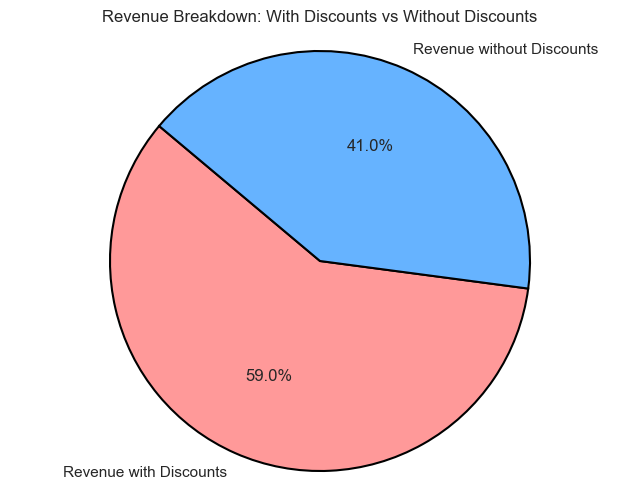

In [52]:
# Calculate Total Revenue with and without Discounts
revenue_with_discounts = df['Fare'].sum()  # Total fare before discount
revenue_without_discounts = df['Total Fare'].sum()  # Total fare after discount


# Print the total revenue with and without discounts
print(f"Revenue with Discounts: {revenue_with_discounts}")
print(f"Revenue without Discounts: {revenue_without_discounts}")

# Prepare data for the pie chart
revenue_data = [revenue_with_discounts, revenue_without_discounts]
labels = ['Revenue with Discounts', 'Revenue without Discounts']
colors = ['#ff9999', '#66b3ff']

# Plot aesthetic pie chart
plt.figure(figsize=(8, 6))
plt.pie(revenue_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})
plt.title('Revenue Breakdown: With Discounts vs Without Discounts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()